In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

from utils import *

In [2]:
train_df = load_train_csv("train.csv")

606 train images - 73585 annotations
Columns : ['id' 'annotation' 'cell_type' 'sample_id']


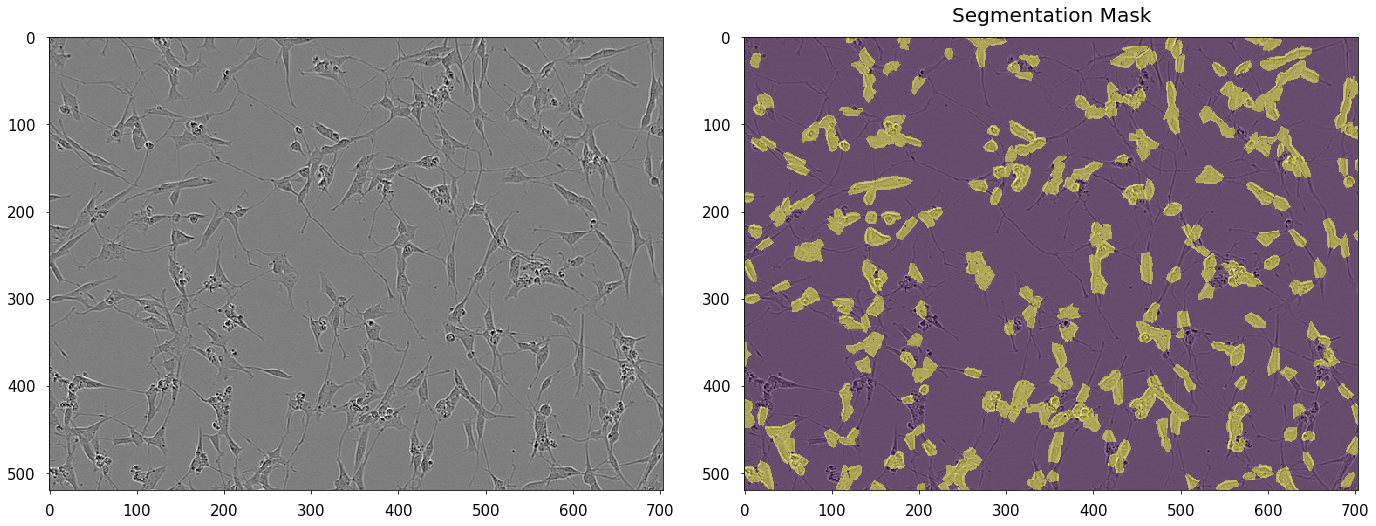

In [3]:
visualize_image_id(df=train_df, image_id=train_df['id'][15000])

In [4]:
mask, _ = merge_masks(train_df, train_df['id'][15000])

In [5]:
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [6]:
def encode_mask_to_rle(mask):
    dots = np.where(mask.flatten() == 1)[0]
    run_lengths = []
    prev = -2
    for b in dots:
        if b > prev + 1:
            run_lengths.extend((b + 1, 0))
        run_lengths[-1] += 1
        prev = b
    return ' '.join(map(str, run_lengths))

In [7]:
rle = encode_mask_to_rle(mask)

In [8]:
rle

'118 13 179 14 253 19 488 10 576 17 599 6 822 13 882 15 957 19 985 4 1191 11 1280 29 1526 13 1586 14 1663 17 1681 2 1687 12 1707 1 1895 10 1983 33 2230 12 2289 15 2369 43 2598 11 2687 40 2934 11 2993 14 3074 43 3302 10 3392 41 3638 10 3697 14 3780 41 4005 11 4018 3 4098 40 4342 8 4402 13 4485 41 4709 11 4721 6 4805 37 5046 7 5106 13 5190 39 5412 11 5424 7 5511 34 5812 10 5895 36 6116 19 6217 32 6516 8 6600 33 6820 20 6923 2 6927 25 7220 9 7305 17 7324 5 7524 20 7632 23 7923 11 8010 16 8190 7 8207 1 8228 20 8337 21 8627 11 8715 14 8888 24 8932 20 9045 15 9088 3 9291 1 9332 10 9421 11 9588 28 9617 1 9636 20 9748 15 9787 1 9790 12 9994 3 10037 9 10089 7 10124 11 10290 29 10320 3 10340 19 10452 13 10489 19 10696 5 10746 4 10792 8 10828 11 10995 33 11046 17 11156 11 11190 22 11399 7 11496 8 11531 11 11700 33 11752 15 11862 6 11892 24 12102 8 12199 10 12235 10 12406 21 12429 11 12459 12 12594 26 12806 9 12903 10 12938 12 13109 3 13113 11 13125 2 13131 14 13163 12 13297 27 13390 3 13509 11 13

In [10]:
round_mask = decode_rle_to_mask(rle, IMAGE_SHAPE)

In [11]:
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [15]:
(round_mask == mask).max()

True